In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [150]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [151]:
train['source']='train'
test['source']='test'
data = pd.concat([train,test],ignore_index=True)

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [153]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [154]:
data.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [155]:
data.Item_Weight=data.Item_Weight.fillna(mean)

In [156]:
data[data.Item_Identifier=='FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
585,FDP10,19.000000,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196,train
2623,FDP10,19.000000,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842,train
3382,FDP10,19.000000,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842,train
4585,FDP10,19.000000,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086,train
6087,FDP10,19.000000,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708,train
7883,FDP10,19.000000,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464,train
11896,FDP10,19.000000,Low Fat,0.128612,Snack Foods,104.1622,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
12371,FDP10,19.000000,Low Fat,0.214397,Snack Foods,105.8622,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test
13327,FDP10,12.857645,Low Fat,0.224269,Snack Foods,104.4622,OUT019,1985,Small,Tier 1,Grocery Store,NaN,test


In [157]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [158]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [159]:
data.Outlet_Size.mode()

0    Medium
dtype: object

In [160]:
mode_of_Outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [161]:
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [162]:
miss_values = data['Outlet_Size'].isnull()   

In [163]:
miss_values

0        False
1        False
2        False
3         True
4        False
         ...  
14199    False
14200    False
14201     True
14202     True
14203     True
Name: Outlet_Size, Length: 14204, dtype: bool

In [164]:
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [165]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Type_Combined              0
dtype: int64

In [166]:
data.Outlet_Size

0        Medium
1        Medium
2        Medium
3         Small
4          High
          ...  
14199     Small
14200    Medium
14201     Small
14202     Small
14203     Small
Name: Outlet_Size, Length: 14204, dtype: object

In [167]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.803980,0.065953,141.004977,1997.830681,2181.288914
std,4.234297,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.857645,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [168]:
sns.set()

C:\Users\mini9\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


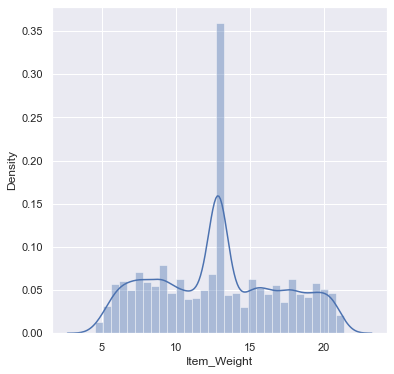

In [169]:
plt.figure(figsize=(6,6))
sns.distplot(data.Item_Weight)
plt.show()

C:\Users\mini9\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


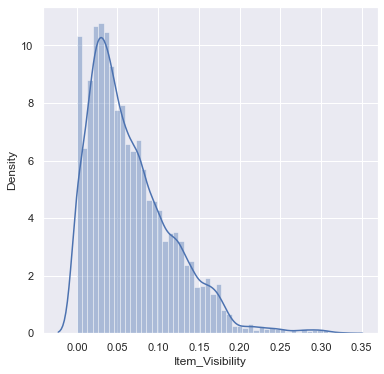

In [170]:
plt.figure(figsize=(6,6))
sns.distplot(data.Item_Visibility)
plt.show()

C:\Users\mini9\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


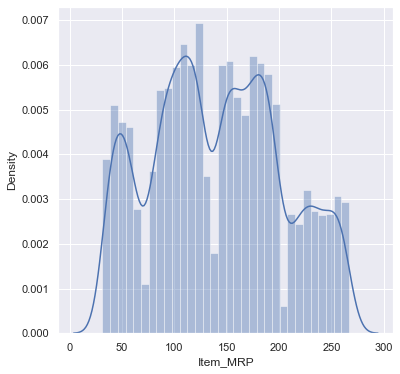

In [171]:
plt.figure(figsize=(6,6))
sns.distplot(data.Item_MRP)
plt.show()

C:\Users\mini9\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


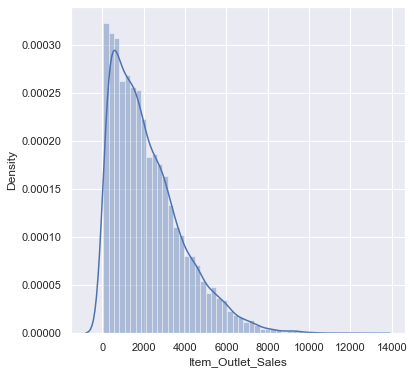

In [172]:
plt.figure(figsize=(6,6))
sns.distplot(data.Item_Outlet_Sales)
plt.show()

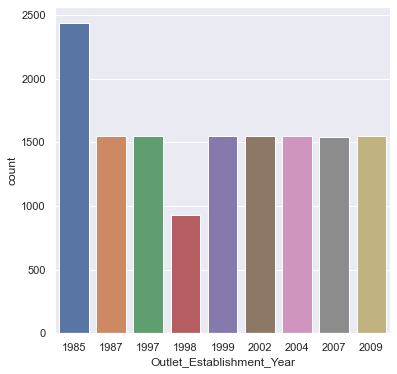

In [173]:
plt.figure(figsize=(6,6))
sns.countplot(x=data.Outlet_Establishment_Year)
plt.show()

In [174]:
data['Outlet_Years'] = 2021 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        23.169319
std          8.371664
min         12.000000
25%         17.000000
50%         22.000000
75%         34.000000
max         36.000000
Name: Outlet_Years, dtype: float64

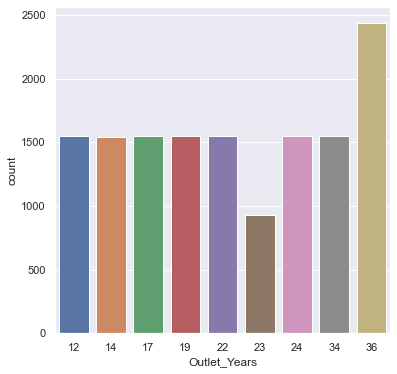

In [175]:
plt.figure(figsize=(6,6))
sns.countplot(x=data.Outlet_Years)
plt.show()

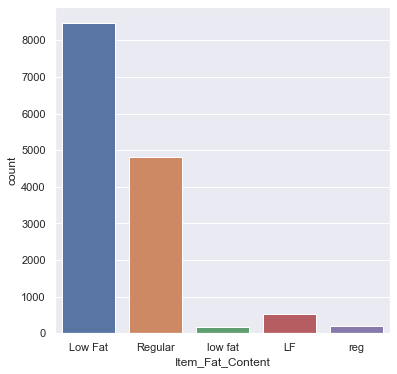

In [176]:
plt.figure(figsize=(6,6))
sns.countplot(x=data.Item_Fat_Content)
plt.show()

In [177]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

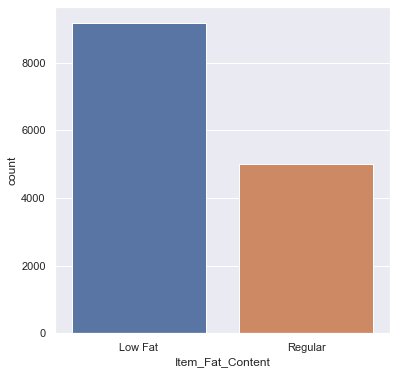

In [178]:
plt.figure(figsize=(6,6))
sns.countplot(x=data.Item_Fat_Content)
plt.show()

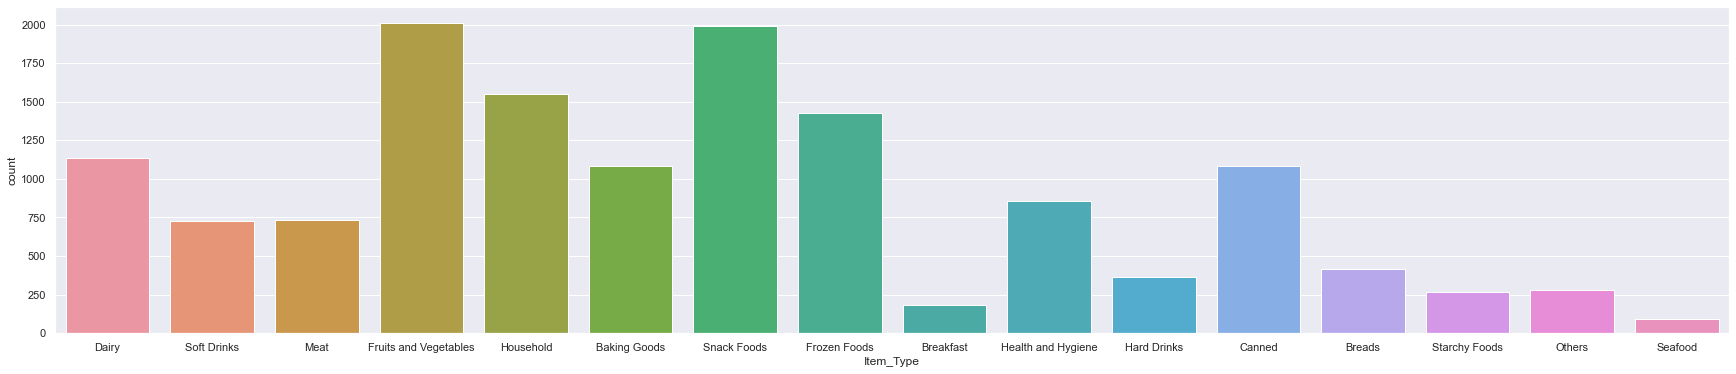

In [179]:
plt.figure(figsize=(30,6))
sns.countplot(x=data.Item_Type)
plt.show()

In [180]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,Food,24
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,Food,12
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,test,Non-Consumable,19
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,test,Food,14


In [181]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [182]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [183]:
data.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [184]:
Fat = pd.get_dummies(data.Item_Fat_Content,drop_first=True)

In [185]:
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [186]:
Type = pd.get_dummies(data.Item_Type,drop_first=True)

In [187]:
encoder = LabelEncoder()

In [188]:
data.Item_Identifier=encoder.fit_transform(data['Item_Identifier'])
data.Item_Fat_Content=encoder.fit_transform(data['Item_Fat_Content'])
data.Outlet_Location_Type=encoder.fit_transform(data['Outlet_Location_Type'])
data.Outlet_Identifier=encoder.fit_transform(data['Outlet_Identifier'])
data.Outlet_Type=encoder.fit_transform(data['Outlet_Type'])
data.Outlet_Size=encoder.fit_transform(data['Outlet_Size'])
data.Item_Type_Combined=encoder.fit_transform(data['Item_Type_Combined'])

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  int32  
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int32  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int32  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int32  
 9   Outlet_Location_Type       14204 non-null  int32  
 10  Outlet_Type                14204 non-null  int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  Item_Type_Combined         14204 non-null  int

In [190]:
data.Outlet_Size.to_string()

'0        1\n1        1\n2        1\n3        2\n4        0\n5        1\n6        0\n7        1\n8        2\n9        2\n10       1\n11       2\n12       1\n13       2\n14       0\n15       2\n16       1\n17       1\n18       1\n19       2\n20       0\n21       1\n22       2\n23       2\n24       2\n25       2\n26       2\n27       0\n28       2\n29       2\n30       2\n31       1\n32       1\n33       2\n34       2\n35       1\n36       1\n37       1\n38       1\n39       1\n40       2\n41       0\n42       1\n43       1\n44       0\n45       2\n46       2\n47       2\n48       2\n49       2\n50       2\n51       0\n52       0\n53       2\n54       2\n55       1\n56       2\n57       1\n58       2\n59       2\n60       1\n61       2\n62       1\n63       2\n64       1\n65       2\n66       2\n67       2\n68       2\n69       2\n70       2\n71       0\n72       2\n73       2\n74       1\n75       2\n76       1\n77       2\n78       2\n79       2\n80       2\n81       2\n82       1\n83 

In [191]:
data.Outlet_Size

0        1
1        1
2        1
3        2
4        0
        ..
14199    2
14200    1
14201    2
14202    2
14203    2
Name: Outlet_Size, Length: 14204, dtype: int32

In [192]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_Years
0,156,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,train,1,22
1,8,5.92,2,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,train,0,12
2,662,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,train,1,22
3,1121,19.20,2,0.000000,Fruits and Vegetables,182.0950,0,1998,2,2,0,732.3800,train,1,23
4,1297,8.93,1,0.000000,Household,53.8614,1,1987,0,2,1,994.7052,train,2,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,2,0.013496,Snack Foods,141.3154,8,1997,2,0,1,NaN,test,1,24
14200,308,7.60,2,0.142991,Starchy Foods,169.1448,3,2009,1,2,2,NaN,test,1,12
14201,1426,10.00,1,0.073529,Health and Hygiene,118.7440,7,2002,2,1,1,NaN,test,2,19
14202,521,15.30,2,0.000000,Canned,214.6218,2,2007,2,1,1,NaN,test,1,14


In [193]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [194]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [195]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\mini9\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [196]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,156,9.300,0,0.016047,249.8092,9,1,0,1,3735.1380,1,22
1,8,5.920,2,0.019278,48.2692,3,1,2,2,443.4228,0,12
2,662,17.500,0,0.016760,141.6180,9,1,0,1,2097.2700,1,22
3,1121,19.200,2,0.000000,182.0950,0,2,2,0,732.3800,1,23
4,1297,8.930,1,0.000000,53.8614,1,0,2,1,994.7052,2,34
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,214.5218,1,0,2,1,2778.3834,1,34
8519,897,8.380,2,0.046982,108.1570,7,2,1,1,549.2850,1,19
8520,1357,10.600,1,0.035186,85.1224,6,2,1,1,1193.1136,2,17
8521,681,7.210,2,0.145221,103.1332,3,1,2,2,1845.5976,1,12


In [199]:
X=train.drop(['Item_Outlet_Sales'],axis=1)
y=train.Item_Outlet_Sales

In [200]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size=0.2)

In [201]:
X_train.shape,y_train.shape

((6818, 11), (6818,))

In [202]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years
6404,188,12.857645,0,0.008722,123.5414,5,1,2,3,1,36
5820,70,18.700000,0,0.014623,52.0324,7,2,1,1,0,19
48,586,15.850000,2,0.121633,60.6220,8,2,0,1,1,24
4583,194,12.857645,0,0.145670,247.2776,4,2,0,0,1,36
3791,436,21.000000,0,0.049296,194.4478,6,2,1,1,1,17
...,...,...,...,...,...,...,...,...,...,...,...
4373,1413,15.200000,1,0.020280,49.1034,0,2,2,0,2,23
7891,746,12.857645,2,0.025616,188.1872,5,1,2,3,1,36
4859,705,13.500000,2,0.000000,78.3960,6,2,1,1,1,17
3264,501,18.700000,0,0.104890,121.4072,7,2,1,1,1,19


In [223]:
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [224]:
pred1 = model.predict(X_train)
score1= metrics.r2_score(y_train,pred1)

In [225]:
score1

0.5025977062212079

In [226]:
pred2 = model.predict(X_test)
score2=metrics.r2_score(y_test,pred2)

In [227]:
score2

0.5077336438301311

In [228]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=0.05,normalize=True)
model2.fit(X_train,y_train)

Ridge(alpha=0.05, normalize=True)

In [229]:
pred1 = model2.predict(X_train)
score1= metrics.r2_score(y_train,pred1)
score1

0.5013279468643346

In [230]:
pred2 = model2.predict(X_test)
score2=metrics.r2_score(y_test,pred2)
score2

0.5060201908079638

In [231]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [232]:
pred1 = dt.predict(X_train)
score1= metrics.r2_score(y_train,pred1)
score1

0.6154319638089591

In [233]:
pred2 = dt.predict(X_test)
score2=metrics.r2_score(y_test,pred2)
score2

0.5843972557626876

In [234]:
dt2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
dt2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)

In [235]:
pred1 = dt2.predict(X_train)
score1= metrics.r2_score(y_train,pred1)
score1

0.6050355080397927

In [236]:
pred2 = dt2.predict(X_test)
score2=metrics.r2_score(y_test,pred2)
score2

0.5840520828216506

In [238]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4)

In [239]:
pred1 = rf.predict(X_train)
score1= metrics.r2_score(y_train,pred1)
score1

0.6047787456389379

In [240]:
pred2 = rf.predict(X_test)
score2=metrics.r2_score(y_test,pred2)
score2

0.590361370495059

In [241]:
rf2 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
rf2.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      n_jobs=4)

In [242]:
pred1 = rf2.predict(X_train)
score1= metrics.r2_score(y_train,pred1)
score1

0.6086756687375783

In [243]:
pred2 = rf2.predict(X_test)
score2=metrics.r2_score(y_test,pred2)
score2

0.5909184595152353